In [1]:
import pandas as pd
import re

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv("data/raw/recipes_sample.csv")

In [3]:
# print all columns and verify if any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   RecipeId                    5000 non-null   int64  
 1   Name                        5000 non-null   object 
 2   AuthorId                    5000 non-null   int64  
 3   AuthorName                  5000 non-null   object 
 4   CookTime                    4183 non-null   object 
 5   PrepTime                    5000 non-null   object 
 6   TotalTime                   5000 non-null   object 
 7   DatePublished               5000 non-null   object 
 8   Description                 5000 non-null   object 
 9   Images                      5000 non-null   object 
 10  RecipeCategory              4998 non-null   object 
 11  Keywords                    4846 non-null   object 
 12  RecipeIngredientQuantities  5000 non-null   object 
 13  RecipeIngredientParts       5000 

In [4]:
# Drop all columns that is not required for analysis
clean_df = df.drop(["AuthorName", "AuthorId", "DatePublished", "CookTime", "PrepTime"], axis=1)

In [5]:
# fill NA in rating with 0 for 0 review
clean_df['AggregatedRating'].fillna(0, inplace=True)
clean_df['ReviewCount'].fillna(0, inplace=True)

In [6]:
# Splitting the 'RecipeYield' column into two new columns
clean_df[['Serving', 'Unit']] = clean_df['RecipeYield'].str.split(' ', n=1, expand=True)

# Converting 'Serving' column to integer
clean_df['Serving'] = clean_df['Serving'].str.extract('(\d+)').astype(float)

# Dropping the original 'RecipeYield' column and the 'Unit' column
clean_df.drop(['RecipeYield', 'Unit'], axis=1, inplace=True)

In [7]:
# Fill NA in "RecipeServings" with "Serving" value where "RecipeServings" is NA and "Serving" is not null
clean_df.loc[clean_df['RecipeServings'].isna() & clean_df['Serving'].notna(), 'RecipeServings'] = clean_df['Serving']

# Convert 'RecipeServings' column to integer type if necessary
clean_df['RecipeServings'] = clean_df['RecipeServings'].astype(float)

In [8]:
# Fill NA in "Keywords" with values from "RecipeIngredientParts"
clean_df['Keywords'].fillna(clean_df['RecipeIngredientParts'], inplace=True)

In [9]:
clean_df = clean_df.drop(["Serving"], axis=1)

In [10]:
# Fill NA in "RecipeServings" with 1
clean_df['RecipeServings'].fillna(1, inplace=True)

In [11]:
# Remove rows with NA in "RecipeCategory"
clean_df = clean_df.dropna(subset=['RecipeCategory', 'Description', 'RecipeIngredientQuantities'])

# Veirfy all column value are cleaned
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4998 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   RecipeId                    4998 non-null   int64  
 1   Name                        4998 non-null   object 
 2   TotalTime                   4998 non-null   object 
 3   Description                 4998 non-null   object 
 4   Images                      4998 non-null   object 
 5   RecipeCategory              4998 non-null   object 
 6   Keywords                    4998 non-null   object 
 7   RecipeIngredientQuantities  4998 non-null   object 
 8   RecipeIngredientParts       4998 non-null   object 
 9   AggregatedRating            4998 non-null   float64
 10  ReviewCount                 4998 non-null   float64
 11  Calories                    4998 non-null   float64
 12  FatContent                  4998 non-null   float64
 13  SaturatedFatContent         4998 non-n

In [12]:
# Remove "PT" prefix
clean_df['TotalTime'] = clean_df['TotalTime'].str.replace("PT", "")
clean_df.head()

,RecipeId,Name,TotalTime,Description,Images,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,...,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeInstructions
0,429918,Easy Chicken and Biscuits,30M,This is an easy recipe that can be done in 30 ...,character(0),One Dish Meal,"""< 30 Mins""","c(""1"", ""1"", ""1"", ""1/4"", ""1/4"", ""4"", ""2"", ""1"")","c(""milk"", ""dried thyme leaves"", ""pepper"", ""ham"")",0.0,...,17.0,5.3,58.6,1644.3,37.0,1.5,6.5,20.8,5.0,"c(""In a 3-quart shallow baking dish mix soups,..."
1,498503,Spring Gnocchi With Asparagus and Shrimp,25M,A perfect blend of the heartiest of winter pas...,character(0),Weeknight,"c(""< 30 Mins"", ""Easy"")","c(""32 -36"", ""4"", ""1"", ""1"", ""1"", ""2"", ""1"", ""4"",...","c(""butter"", ""lemon, juice and zest of"", ""salt""...",0.0,...,11.0,6.4,121.2,1018.0,8.5,3.4,2.4,16.3,6.0,"c(""Boil a large pot of salted water and add gn..."
2,263162,Romano Grits,20M,"This recipe can be multiplied by 2, 3, 4. The...",character(0),Breakfast,"c(""Very Low Carbs"", ""Low Protein"", ""Low Choles...","c(""2"", ""1/2"", ""1/4"", ""1"")","c(""water"", ""yellow corn grits"", ""salt"", ""pecor...",5.0,...,3.9,2.4,14.7,466.0,3.7,0.1,0.1,4.9,2.0,"c(""Place the water in a medium sauce pan over ..."
3,72878,Lemon Chess Pie,50M,Make and share this Lemon Chess Pie recipe fro...,character(0),Pie,"c(""Dessert"", ""< 60 Mins"")","c(""1 1/2"", ""2"", ""4"", ""1"", ""1/2"", ""1"")","c(""sugar"", ""butter"", ""eggs"", ""fresh lemon rind"")",4.0,...,12.8,4.5,113.4,172.4,48.5,0.9,37.8,4.6,8.0,"c(""Pre heat oven to 400."", ""Cream together but..."
4,350007,Slow Cooked Chicken and Dressing,4H25M,This is so delicious! If you want an easy com...,character(0),One Dish Meal,"c(""Chicken"", ""Poultry"", ""Meat"", ""Kid Friendly""...","c(""1"", ""6"", ""8"", ""2"", ""2"", ""1"", ""3"", ""4"", ""2"",...","c(""chicken broth"", ""onion"", ""celery ribs"", ""eg...",0.0,...,27.6,11.8,191.3,1275.0,22.5,1.2,3.0,24.8,1.0,"c(""Combine first 11 ingredients in a large bow..."


In [13]:
# Create a new column "URL" with the initial value from "Name" and "RecipeId" column
# Food.com url example "https://www.food.com/recipe/japanese-pumpkin-soup-kabocha-soup-88935"

#Create new column URL to store generated URL Link
clean_df['URL'] = clean_df['Name']

# Remove parentheses, dashes, and commas from the "URL" column
clean_df['URL'] = clean_df['URL'].str.replace(r'[\(\)\-,]', '')  

# Select the "URL" column and apply transformations
clean_df['URL'] = clean_df['URL'].str.replace(' ', '-')  # Replace spaces with hyphens
clean_df['URL'] = clean_df['URL'].str.lower()  # Convert text to lowercase

# Concatenate "https://www.food.com/recipe/" with the modified "URL" column
clean_df['URL'] = 'https://www.food.com/recipe/' + clean_df['URL'] + '-' + clean_df['RecipeId'].astype(str)
clean_df['URL']

0       https://www.food.com/recipe/easy-chicken-and-b...
1       https://www.food.com/recipe/spring-gnocchi-wit...
2         https://www.food.com/recipe/romano-grits-263162
3       https://www.food.com/recipe/lemon-chess-pie-72878
4       https://www.food.com/recipe/slow-cooked-chicke...
                              ...                        
4995    https://www.food.com/recipe/simplified-cassoul...
4996    https://www.food.com/recipe/tomato-and-pepper-...
4997    https://www.food.com/recipe/bbq'd-pork-&-prune...
4998    https://www.food.com/recipe/homemade-buttermil...
4999       https://www.food.com/recipe/easy-quiche-500686
Name: URL, Length: 4998, dtype: object

In [14]:
# Remove "c()" at the beginning and parentheses from each value
clean_df['Keywords'] = clean_df['Keywords'].str.replace(r'^c|[()]', '', regex=True)
clean_df['RecipeIngredientQuantities'] = clean_df['RecipeIngredientQuantities'].str.replace(r'^c|[()]', '', regex=True)
clean_df['RecipeIngredientParts'] = clean_df['RecipeIngredientParts'].str.replace(r'^c|[()]', '', regex=True)
clean_df['RecipeInstructions'] = clean_df['RecipeInstructions'].str.replace(r'^c|[()]', '', regex=True)
clean_df['Images'] = clean_df['Images'].str.replace(r'^c|[()]', '', regex=True)

In [15]:
# Split the strings by comma, explode the resulting lists, and get unique items
keyword_item = clean_df['Keywords'].str.split(',').explode().str.strip().unique()

# Convert to list
keyword_item_list = keyword_item.tolist()

# Print the length of the list
print("Number of unique items:", len(keyword_item_list))

Number of unique items: 574


In [16]:
# Create unique_keyword_item to understand what is in the Keywords column for future programming use
# Clean up each string (remove leading/trailing spaces, convert to lowercase, and strip double quotes) before converting to set
unique_keyword_item_set = set(map(lambda x: x.strip().lower().strip('"'), keyword_item_list))

# Convert the set back to a list if needed
unique_keyword_item_list = list(unique_keyword_item_set)

# Print the length of the list
print("Number of unique items:", len(unique_keyword_item_list))

Number of unique items: 560


In [17]:
# Verify all data are cleaned properly 
clean_df.head()

,RecipeId,Name,TotalTime,Description,Images,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeInstructions,URL
0,429918,Easy Chicken and Biscuits,30M,This is an easy recipe that can be done in 30 ...,haracter0,One Dish Meal,"""< 30 Mins""","""1"", ""1"", ""1"", ""1/4"", ""1/4"", ""4"", ""2"", ""1""","""milk"", ""dried thyme leaves"", ""pepper"", ""ham""",0.0,...,5.3,58.6,1644.3,37.0,1.5,6.5,20.8,5.0,"""In a 3-quart shallow baking dish mix soups, m...",https://www.food.com/recipe/easy-chicken-and-b...
1,498503,Spring Gnocchi With Asparagus and Shrimp,25M,A perfect blend of the heartiest of winter pas...,haracter0,Weeknight,"""< 30 Mins"", ""Easy""","""32 -36"", ""4"", ""1"", ""1"", ""1"", ""2"", ""1"", ""4"", ""...","""butter"", ""lemon, juice and zest of"", ""salt"", ...",0.0,...,6.4,121.2,1018.0,8.5,3.4,2.4,16.3,6.0,"""Boil a large pot of salted water and add gnoc...",https://www.food.com/recipe/spring-gnocchi-wit...
2,263162,Romano Grits,20M,"This recipe can be multiplied by 2, 3, 4. The...",haracter0,Breakfast,"""Very Low Carbs"", ""Low Protein"", ""Low Choleste...","""2"", ""1/2"", ""1/4"", ""1""","""water"", ""yellow corn grits"", ""salt"", ""pecorin...",5.0,...,2.4,14.7,466.0,3.7,0.1,0.1,4.9,2.0,"""Place the water in a medium sauce pan over hi...",https://www.food.com/recipe/romano-grits-263162
3,72878,Lemon Chess Pie,50M,Make and share this Lemon Chess Pie recipe fro...,haracter0,Pie,"""Dessert"", ""< 60 Mins""","""1 1/2"", ""2"", ""4"", ""1"", ""1/2"", ""1""","""sugar"", ""butter"", ""eggs"", ""fresh lemon rind""",4.0,...,4.5,113.4,172.4,48.5,0.9,37.8,4.6,8.0,"""Pre heat oven to 400."", ""Cream together butte...",https://www.food.com/recipe/lemon-chess-pie-72878
4,350007,Slow Cooked Chicken and Dressing,4H25M,This is so delicious! If you want an easy com...,haracter0,One Dish Meal,"""Chicken"", ""Poultry"", ""Meat"", ""Kid Friendly"", ...","""1"", ""6"", ""8"", ""2"", ""2"", ""1"", ""3"", ""4"", ""2"", ""...","""chicken broth"", ""onion"", ""celery ribs"", ""eggs...",0.0,...,11.8,191.3,1275.0,22.5,1.2,3.0,24.8,1.0,"""Combine first 11 ingredients in a large bowl....",https://www.food.com/recipe/slow-cooked-chicke...


In [18]:
# Extract the recipe ingredients from the "RecipeIngredientParts" column
ingredients_series = clean_df['RecipeIngredientParts']

# Split the ingredients into individual items
ingredients_split = ingredients_series.str.split(',')

# Create a list of unique ingredients
unique_ingredients = []
for ingredients in ingredients_split:
    if isinstance(ingredients, list):
        for ingredient in ingredients:
            ingredient = ingredient.strip()
            if ingredient not in unique_ingredients and ingredient != '':
                unique_ingredients.append(ingredient)

In [19]:
# Create a DataFrame with columns representing unique ingredients
ingredient_df = pd.DataFrame(0, index=clean_df.index, columns=unique_ingredients)

# Populate the DataFrame with 1 where ingredient is present in the recipe
for ingredient in unique_ingredients:
    ingredient_df[ingredient] = ingredients_series.str.contains(ingredient, na=False, regex=False).astype(int)


In [20]:
# Create new table call recipes with clean_df and ingredient_df for ML features to learn
recipes = pd.concat([clean_df, ingredient_df], axis=1)

In [21]:
# Melt the DataFrame to convert ingredient columns into rows
melted_df = recipes.melt(var_name='Ingredient', value_name='Present')

# Filter out rows where ingredient is present
present_ingredients = melted_df[melted_df['Present'] == 1]

# Count the occurrences of each ingredient
ingredient_counts = present_ingredients['Ingredient'].value_counts().reset_index()

# Rename columns
ingredient_counts.columns = ['Ingredient', 'Count']

In [22]:
# Define the thresholds for each category to match each Healthy category
category_thresholds = {
    'Low Sodium': 140,    # Daily recommended intake for low sodium
    'Low Calorie': 200,   # Arbitrary threshold for low calorie
    'High Protein': 20,   # Arbitrary threshold for high protein
    'Low Fat': 3,         # Arbitrary threshold for low fat
    'High Fat': 20,       # Arbitrary threshold for high fat
    'High Fiber': 5,      # Arbitrary threshold for high fiber
    'Low Carb': 20,       # Arbitrary threshold for low carb
    'Low Cholesterol': 20, # Arbitrary threshold for low cholesterol
    'Low Sugar': 5        # Arbitrary threshold for low sugar
}

In [23]:
# Create new columns for each category and assign boolean values based on thresholds
for category, threshold in category_thresholds.items():
    recipes[category] = False
    if category == 'Low Sodium':
        recipes.loc[recipes['SodiumContent'] < threshold, category] = True
    elif category == 'Low Calorie':
        recipes.loc[recipes['Calories'] < threshold, category] = True
    elif category == 'High Protein':
        recipes.loc[recipes['ProteinContent'] > threshold, category] = True
    elif category == 'Low Fat':
        recipes.loc[recipes['FatContent'] < threshold, category] = True
    elif category == 'High Fat':
        recipes.loc[recipes['FatContent'] > threshold, category] = True
    elif category == 'high fiber':
        recipes.loc[recipes['FiberContent'] > threshold, category] = True
    elif category == 'Low Carb':
        recipes.loc[recipes['CarbohydrateContent'] < threshold, category] = True
    elif category == 'Low Cholesterol':
        recipes.loc[recipes['CholesterolContent'] < threshold, category] = True
    elif category == 'Low Sugar':
        recipes.loc[recipes['SugarContent'] < threshold, category] = True

In [24]:
# Drop all columns except the newly created category columns
columns_to_keep = ["Name"] + list(category_thresholds.keys())

# make new copy table recipes2 to store binery of each category_thresholds
recipes2 = recipes[columns_to_keep]

In [25]:
# Function to determine the category for each recipe
def determine_category(row):
    for category, threshold in category_thresholds.items():
        if category == 'Low Sodium':
            if row['SodiumContent'] < threshold:
                return category
        elif category == 'Low Calorie':
            if row['Calories'] < threshold:
                return category
        elif category == 'High Protein':
            if row['ProteinContent'] > threshold:
                return category
        elif category == 'Low Fat':
            if row['FatContent'] < threshold:
                return category
        elif category == 'High Fat':
            if row['FatContent'] > threshold:
                return category
        elif category == 'High Fiber':
            if row['FiberContent'] > threshold:
                return category
        elif category == 'Low Carb':
            if row['CarbohydrateContent'] < threshold:
                return category
        elif category == 'Low Cholesterol':
            if row['CholesterolContent'] < threshold:
                return category
        elif category == 'Low Sugar':
            if row['SugarContent'] < threshold:
                return category
    # If no category is assigned, return None
    return None

# Apply the determine_category function to each row to determine the category for each recipe and add it to the recipes table
recipes['AssignedCategory'] = recipes.apply(determine_category, axis=1)

In [26]:
# Verify all Category are properly appended
recipes.head()

,RecipeId,Name,TotalTime,Description,Images,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,...,Low Sodium,Low Calorie,High Protein,Low Fat,High Fat,High Fiber,Low Carb,Low Cholesterol,Low Sugar,AssignedCategory
0,429918,Easy Chicken and Biscuits,30M,This is an easy recipe that can be done in 30 ...,haracter0,One Dish Meal,"""< 30 Mins""","""1"", ""1"", ""1"", ""1/4"", ""1/4"", ""4"", ""2"", ""1""","""milk"", ""dried thyme leaves"", ""pepper"", ""ham""",0.0,...,False,False,True,False,False,False,False,False,False,High Protein
1,498503,Spring Gnocchi With Asparagus and Shrimp,25M,A perfect blend of the heartiest of winter pas...,haracter0,Weeknight,"""< 30 Mins"", ""Easy""","""32 -36"", ""4"", ""1"", ""1"", ""1"", ""2"", ""1"", ""4"", ""...","""butter"", ""lemon, juice and zest of"", ""salt"", ...",0.0,...,False,True,False,False,False,False,True,False,True,Low Calorie
2,263162,Romano Grits,20M,"This recipe can be multiplied by 2, 3, 4. The...",haracter0,Breakfast,"""Very Low Carbs"", ""Low Protein"", ""Low Choleste...","""2"", ""1/2"", ""1/4"", ""1""","""water"", ""yellow corn grits"", ""salt"", ""pecorin...",5.0,...,False,True,False,False,False,False,True,True,True,Low Calorie
3,72878,Lemon Chess Pie,50M,Make and share this Lemon Chess Pie recipe fro...,haracter0,Pie,"""Dessert"", ""< 60 Mins""","""1 1/2"", ""2"", ""4"", ""1"", ""1/2"", ""1""","""sugar"", ""butter"", ""eggs"", ""fresh lemon rind""",4.0,...,False,False,False,False,False,False,False,False,False,None
4,350007,Slow Cooked Chicken and Dressing,4H25M,This is so delicious! If you want an easy com...,haracter0,One Dish Meal,"""Chicken"", ""Poultry"", ""Meat"", ""Kid Friendly"", ...","""1"", ""6"", ""8"", ""2"", ""2"", ""1"", ""3"", ""4"", ""2"", ""...","""chicken broth"", ""onion"", ""celery ribs"", ""eggs...",0.0,...,False,False,True,False,True,False,False,False,True,High Protein


In [27]:
# Adding Health Keywords to Keywords column
# Define the criteria for adding keywords
criteria = (
    recipes['FiberContent'] > 5
) | (
    recipes['RecipeCategory'].str.contains('High In', na=False)
) | (
    recipes['ProteinContent'] > 20
) | (
    recipes['RecipeCategory'].str.contains('Homeopathy/Remedies', na=False)
) | (
    recipes['RecipeCategory'].str.contains('Kid Friendly', na=False)
) | (
    recipes['RecipeCategory'].str.contains('Lactose Free', na=False)
) | (
    recipes['RecipeCategory'].str.contains('Low Cholesterol', na=False)
) | (
    recipes['RecipeCategory'].str.contains('Low Protein', na=False)
) | (
    recipes['RecipeCategory'].str.contains('No Shell Fish', na=False)
) | (
    recipes['RecipeCategory'].str.contains('Soy/Tofu', na=False)
) | (
    recipes['CarbohydrateContent'] < 5
) | (
    recipes['RecipeCategory'].str.contains('High In.*Diabetic Friendly', na=False)
) | (
    recipes['RecipeCategory'].str.contains('Bath/Beauty', na=False)
) | (
    recipes['RecipeCategory'].str.contains('Egg Free', na=False)
) | (
    recipes['RecipeCategory'].str.contains('Healthy', na=False)
) | (
    recipes['RecipeCategory'].str.contains('Kosher', na=False)
) | (
    recipes['RecipeCategory'].str.contains('Toddler Friendly', na=False)
) | (
    recipes['RecipeCategory'].str.contains('Vegan', na=False)
) | (
    recipes['RecipeCategory'].str.contains('Vegetable', na=False)
)

In [28]:
# Add the specified keywords to the Keywords column for recipes that meet the criteria
clean_df.loc[criteria, 'Keywords'] = recipes.loc[criteria, 'Keywords'] + ', "High Fiber", "High Protein", "Homeopathy/Remedies", "Kid Friendly", "Lactose Free", "Low Cholesterol", "Low Protein", "No Shell Fish", "Soy/Tofu", "Very Low Carbs", "Diabetic Friendly", "Bath/Beauty", "Egg Free", "Healthy", "Kosher", "Toddler Friendly", "Vegan", "Vegetable"'

In [29]:
# Get the column names of ingredient_df
ingredient_columns = ingredient_df.columns.tolist()

# Assign ingredient_columns to columns_to_drop
columns_to_drop = ingredient_columns

# Dropping the columns from the DataFrame
recipes.drop(columns=columns_to_drop, inplace=True)

In [30]:
# Save clean data to a new CSV file for ML model testing
recipes.to_csv("data/clean/ML_test_recipes.csv", index=False)

In [31]:
# Save clean data to a new JSON file
clean_df.to_json("data/clean/cleanSamplerecipes.json", orient="records")

# Perform supervised machine learning (ML) training aimed at understanding health ingredients.

In [32]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import joblib

# Read the ML test CSV file into a DataFrame
ML_test_df = pd.read_csv("data/clean/ML_test_recipes.csv")

# List of columns containing string values to be dropped
columns_to_drop = ['Name', 'TotalTime', 'Images', 'RecipeCategory', 'Keywords', 'Description',
                   'RecipeIngredientQuantities', 'RecipeIngredientParts', 'AggregatedRating','ReviewCount',
                  'RecipeInstructions', 'URL', 'AssignedCategory']           

# Dropping the columns from the DataFrame
ML_test_df.drop(columns=columns_to_drop, inplace=True)
ML_test_df.head()

,RecipeId,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,Low Sodium,Low Calorie,High Protein,Low Fat,High Fat,High Fiber,Low Carb,Low Cholesterol,Low Sugar
0,429918,385.5,17.0,5.3,58.6,1644.3,37.0,1.5,6.5,20.8,5.0,False,False,True,False,False,False,False,False,False
1,498503,188.0,11.0,6.4,121.2,1018.0,8.5,3.4,2.4,16.3,6.0,False,True,False,False,False,False,True,False,True
2,263162,69.6,3.9,2.4,14.7,466.0,3.7,0.1,0.1,4.9,2.0,False,True,False,False,False,False,True,True,True
3,72878,322.6,12.8,4.5,113.4,172.4,48.5,0.9,37.8,4.6,8.0,False,False,False,False,False,False,False,False,False
4,350007,440.8,27.6,11.8,191.3,1275.0,22.5,1.2,3.0,24.8,1.0,False,False,True,False,True,False,False,False,True


In [33]:
# Define features (X) and target variable (y)
# Features
X = ML_test_df.drop(columns=['Low Sodium', 'Low Calorie', 'High Protein', 'Low Fat', 'High Fat',	
                             'High Fiber', 'Low Carb', 'Low Cholesterol', 'Low Sugar'])
# Labels for multiple health attributes
y = ML_test_df[['Low Sodium', 'Low Calorie', 'High Protein', 'Low Fat',	'High Fat',	'High Fiber', 
                'Low Carb', 'Low Cholesterol', 'Low Sugar']]  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Model Selection with Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Training the Best Model
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=300)

In [35]:
# Model Evaluation
y_pred = best_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       276
           1       1.00      1.00      1.00       293
           2       1.00      1.00      1.00       304
           3       1.00      0.98      0.99       167
           4       1.00      1.00      1.00       338
           5       0.00      0.00      0.00         0
           6       0.99      1.00      1.00       394
           7       1.00      1.00      1.00       398
           8       1.00      1.00      1.00       422

   micro avg       1.00      1.00      1.00      2592
   macro avg       0.89      0.89      0.89      2592
weighted avg       1.00      1.00      1.00      2592
 samples avg       0.92      0.92      0.92      2592



C:\Users\vivi4\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vivi4\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vivi4\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vivi4\anaconda3\Lib\site-packages\sklearn\metrics\_cla

In [36]:
# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest classifier:", accuracy)

Accuracy of Random Forest classifier: 0.993


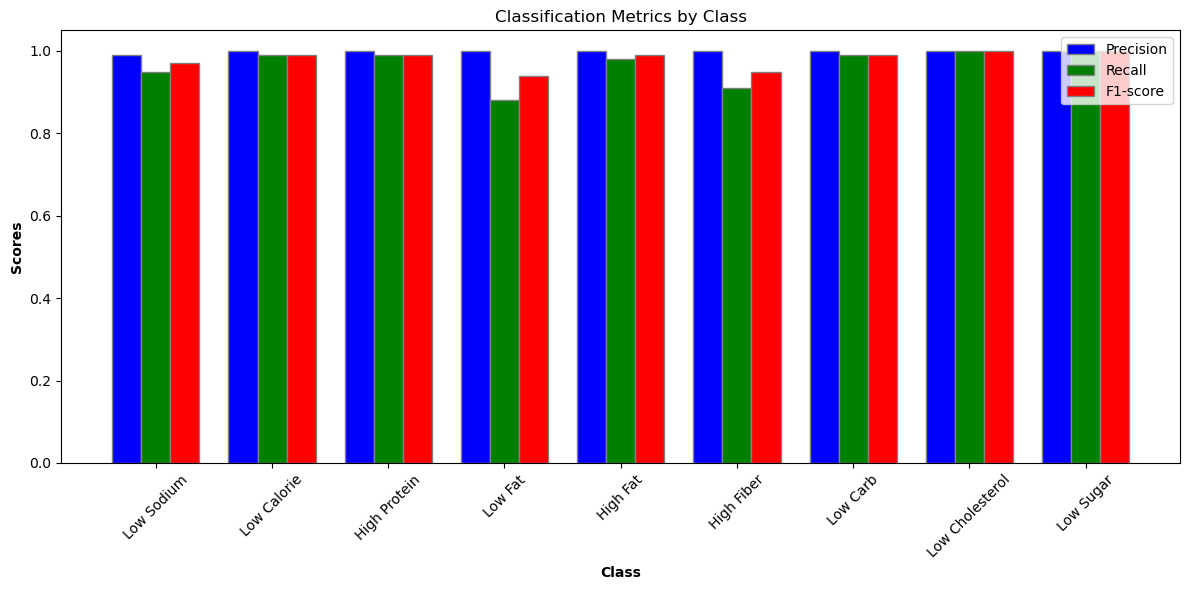

In [37]:
# Class labels
classes = ['Low Sodium', 'Low Calorie', 'High Protein', 'Low Fat', 'High Fat', 
           'High Fiber', 'Low Carb', 'Low Cholesterol', 'Low Sugar']

# Precision, recall, and F1-score values for each class
precision = [0.99, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00]
recall = [0.95, 0.99, 0.99, 0.88, 0.98, 0.91, 0.99, 1.00, 1.00]
f1_score = [0.97, 0.99, 0.99, 0.94, 0.99, 0.95, 0.99, 1.00, 1.00]

# Set width of bar
bar_width = 0.25

# Set position of bar on X axis
r1 = np.arange(len(precision))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Make the plot
plt.figure(figsize=(12, 6))
plt.bar(r1, precision, color='b', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r2, recall, color='g', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, f1_score, color='r', width=bar_width, edgecolor='grey', label='F1-score')

# Add xticks on the middle of the group bars
plt.xlabel('Class', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(precision))], classes, rotation=45)

# Add y label
plt.ylabel('Scores', fontweight='bold')

# Create legend & Show graphic
plt.legend()
plt.title('Classification Metrics by Class')
plt.tight_layout()
plt.show()

In [38]:
# Save the best model to a file
joblib.dump(best_model, 'data/MLmodel/best_model.pkl')

['data/MLmodel/best_model.pkl']

# Utilize the machine learning trained model to compute and allocate a 'Healthy Recipe' category to each individual recipe.

In [39]:
# Load the model
model = joblib.load('data/MLmodel/best_model.pkl')

# Read the new data
df = pd.read_csv('data/raw/recipes.csv')

In [40]:
# Drop all columns that is not required for analysis
new_data = df.drop(["AuthorName", "AuthorId", "DatePublished", "CookTime", "PrepTime"], axis=1)

# Drop rows with NA values in 'AggregatedRating' and 'ReviewCount' columns where no reviews
new_data.dropna(subset=['AggregatedRating', 'ReviewCount'], inplace=True)

# Splitting the 'RecipeYield' column into two new columns
new_data[['Serving', 'Unit']] = new_data['RecipeYield'].str.split(' ', n=1, expand=True)

# Converting 'Serving' column to integer
new_data['Serving'] = new_data['Serving'].str.extract('(\d+)').astype(float)

# Dropping the original 'RecipeYield' column and the 'Unit' column
new_data.drop(['RecipeYield', 'Unit'], axis=1, inplace=True)

# Fill NA in "RecipeServings" with "Serving" value where "RecipeServings" is NA and "Serving" is not null
new_data.loc[new_data['RecipeServings'].isna() & new_data['Serving'].notna(), 'RecipeServings'] = new_data['Serving']

# Convert 'RecipeServings' column to integer type if necessary
new_data['RecipeServings'] = new_data['RecipeServings'].astype(float)

# Fill NA in "Keywords" with values from "RecipeIngredientParts"
new_data['Keywords'].fillna(new_data['RecipeIngredientParts'], inplace=True)

new_data = new_data.drop(["Serving"], axis=1)

# Fill NA in "RecipeServings" with 1
new_data['RecipeServings'].fillna(1, inplace=True)

# Remove rows with NA in "RecipeCategory"
new_data = new_data.dropna(subset=['RecipeCategory', 'Description', 'RecipeIngredientQuantities'])

# Remove "PT" prefix
new_data['TotalTime'] = new_data['TotalTime'].str.replace("PT", "")

# Remove "c" at the beginning and parentheses from required columns
new_data['Keywords'] = new_data['Keywords'].str.replace(r'^c|[()]', '', regex=True)
new_data['RecipeIngredientQuantities'] = new_data['RecipeIngredientQuantities'].str.replace(r'^c|[()]', '', regex=True)
new_data['RecipeIngredientParts'] = new_data['RecipeIngredientParts'].str.replace(r'^c|[()]', '', regex=True)
new_data['RecipeInstructions'] = new_data['RecipeInstructions'].str.replace(r'^c|[()]', '', regex=True)
new_data['Images'] = new_data['Images'].str.replace(r'^c|[()]', '', regex=True)

# Keywords count in original DATA

In [41]:
# List of keywords to match
keywords_to_match = ['Low Sodium', 'Low Calorie', 'High Protein', 'Low Fat', 'High Fat', 
                     'High Fiber', 'Low Carb', 'Low Cholesterol', 'Low Sugar']

# Initialize a dictionary to store counts
keyword_counts = {keyword: 0 for keyword in keywords_to_match}

# Iterate over each row in the DataFrame
for row_keywords in new_data['Keywords']:
    # Split the string by commas and remove leading/trailing whitespace and double quotes
    keywords = [keyword.strip().strip('"') for keyword in row_keywords.split(',')]
    # Count occurrences of each keyword
    for keyword in keywords:
        if keyword in keywords_to_match:
            keyword_counts[keyword] += 1

# Print the counts
for keyword, count in keyword_counts.items():
    print(f"{keyword}: {count}")

Low Sodium: 0
Low Calorie: 0
High Protein: 7685
Low Fat: 0
High Fat: 0
High Fiber: 325
Low Carb: 0
Low Cholesterol: 41270
Low Sugar: 0


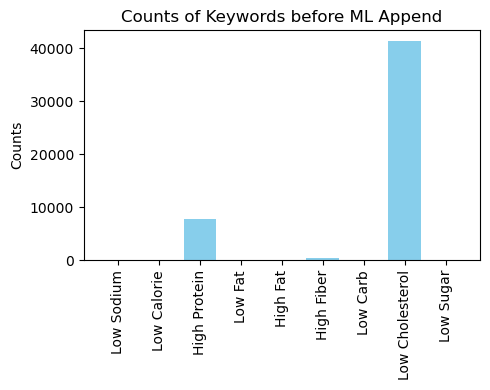

In [42]:
# Plotting the bar chart
plt.figure(figsize=(5, 4))  # Adjust the figsize as needed
plt.bar(keyword_counts.keys(), keyword_counts.values(), color='skyblue')
plt.ylabel('Counts')
plt.title('Counts of Keywords before ML Append')
plt.xticks(rotation=90)
plt.tight_layout()  # Add tight layout
plt.show()

In [43]:
# Save clean data to a new CSV file
new_data.to_csv("data/clean/clean_recipes.csv", index=False)

In [44]:
# Create a copy of new_data
# Drop all columns with value = stings
test_data = new_data.copy()

# Columns to drop
columns_to_drop = ['Name', 'TotalTime', 'Description', 'Images', 'RecipeCategory', 
                   'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts', 
                   'AggregatedRating', 'ReviewCount', 'RecipeInstructions']

# Drop the columns from the DataFrame
test_data.drop(columns=columns_to_drop, inplace=True)

In [45]:
# Make predictions
predictions = model.predict(test_data)

# Add keywords based on predictions
predicted_keywords = ['Low Sodium', 'Low Calorie', 'High Protein', 'Low Fat', 'High Fat', 
                      'High Fiber', 'Low Carb', 'Low Cholesterol', 'Low Sugar']

# Initialize an empty list to store the keywords for each record
keywords_added = []

# Count occurrences of each keyword
keyword_counts = {keyword: 0 for keyword in predicted_keywords}

for pred in predictions:
    # Initialize an empty list to store keywords for the current record
    keywords = []
    for i, val in enumerate(pred):
        # If the value is true (1), append the corresponding keyword
        if val == 1:
            keyword = predicted_keywords[i]
            keywords.append(keyword)
            # Increment the count for this keyword
            keyword_counts[keyword] += 1
    # Append the list of keywords for the current record to the overall list
    keywords_added.append(keywords)

# Print keyword counts
print("Keyword Counts:")
for keyword, count in keyword_counts.items():
    print(f"{keyword}: {count}")

Keyword Counts:
Low Sodium: 71064
Low Calorie: 80948
High Protein: 85050
Low Fat: 40503
High Fat: 94680
High Fiber: 0
Low Carb: 102756
Low Cholesterol: 100202
Low Sugar: 117030


In [46]:
# Add keywords to the new_data DataFrame
new_data['test_Keywords'] = keywords_added

In [47]:
new_data['test_Keywords'].head()

0    [Low Sodium, Low Calorie, Low Fat, Low Cholest...
1                             [High Protein, High Fat]
2               [Low Sodium, Low Fat, Low Cholesterol]
3            [High Protein, High Fat, Low Cholesterol]
4              [Low Calorie, Low Fat, Low Cholesterol]
Name: test_Keywords, dtype: object

In [48]:
# Convert non-string values to strings, then split them into lists of keywords
new_data['test_Keywords'] = new_data['test_Keywords'].astype(str).str.split(',')

# Iterate over each row and append the keywords from 'test_Keywords' to 'Keywords'
for index, row in new_data.iterrows():
    keywords = row['test_Keywords']
    if isinstance(keywords, list):
        # Enclose each keyword in double quotes and join keywords into a single string
        keywords = ', '.join(['"' + keyword.strip("[]' ") + '"' for keyword in keywords])
        new_data.at[index, 'Keywords'] += ", " + keywords

# Drop the 'test_Keywords' column if needed
new_data.drop('test_Keywords', axis=1, inplace=True)

In [49]:
print(new_data['Keywords'].iloc[0])

"Dessert", "Low Protein", "Low Cholesterol", "Healthy", "Free Of...", "Summer", "Weeknight", "Freezer", "Easy", "Low Sodium", "Low Calorie", "Low Fat", "Low Cholesterol"


In [50]:
# Create a new column "URL" with the initial value from "Name" and "RecipeId" column
# Food.com url example "https://www.food.com/recipe/japanese-pumpkin-soup-kabocha-soup-88935"

#Create new column URL to store generated URL Link
new_data['URL'] = new_data['Name']

# Remove parentheses, dashes, and commas from the "URL" column
new_data['URL'] = new_data['URL'].str.replace(r'[\(\)\-,]', '')  

# Select the "URL" column and apply transformations
new_data['URL'] = new_data['URL'].str.replace(' ', '-')  # Replace spaces with hyphens
new_data['URL'] = new_data['URL'].str.lower()  # Convert text to lowercase

# Concatenate "https://www.food.com/recipe/" with the modified "URL" column
new_data['URL'] = 'https://www.food.com/recipe/' + new_data['URL'] + '-' + new_data['RecipeId'].astype(str)
new_data['URL']

0         https://www.food.com/recipe/low-fat-berry-blue...
1                    https://www.food.com/recipe/biryani-39
2              https://www.food.com/recipe/best-lemonade-40
3         https://www.food.com/recipe/carina's-tofu-vege...
4               https://www.food.com/recipe/cabbage-soup-42
                                ...                        
522018    https://www.food.com/recipe/backyard-breakfast...
522039    https://www.food.com/recipe/butter-pecan-banan...
522167    https://www.food.com/recipe/everything-but-the...
522330    https://www.food.com/recipe/the-most-refreshin...
522431    https://www.food.com/recipe/homemade-ketchup-5...
Name: URL, Length: 269044, dtype: object

# Count of Healthy Keyword after ML append

In [51]:
# List of keywords to match
keywords_to_match = ['Low Sodium', 'Low Calorie', 'High Protein', 'Low Fat', 'High Fat', 
                      'High Fiber', 'Low Carb', 'Low Cholesterol', 'Low Sugar']

# Initialize a dictionary to store counts
keyword_counts = {keyword: 0 for keyword in keywords_to_match}

# Iterate over each row in the DataFrame
for row_keywords in new_data['Keywords']:
    # Split the string by commas and remove leading/trailing whitespace and double quotes
    keywords = [keyword.strip().strip('"') for keyword in row_keywords.split(',')]
    # Count occurrences of each keyword
    for keyword in keywords:
        if keyword in keywords_to_match:
            keyword_counts[keyword] += 1

# Print the counts
for keyword, count in keyword_counts.items():
    print(f"{keyword}: {count}")

Low Sodium: 71064
Low Calorie: 80948
High Protein: 92735
Low Fat: 40503
High Fat: 94680
High Fiber: 325
Low Carb: 102756
Low Cholesterol: 141472
Low Sugar: 117030


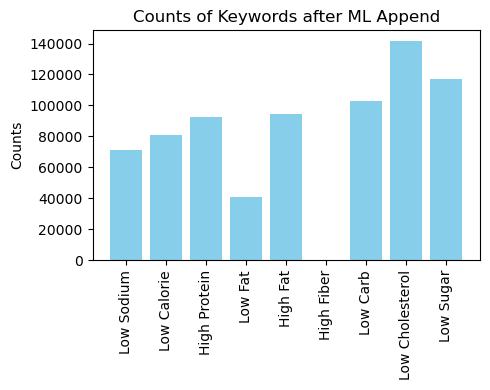

In [52]:
# Plotting the bar chart
plt.figure(figsize=(5, 4))  # Adjust the figsize as needed
plt.bar(keyword_counts.keys(), keyword_counts.values(), color='skyblue')
plt.ylabel('Counts')
plt.title('Counts of Keywords after ML Append')
plt.xticks(rotation=90)
plt.tight_layout()  # Add tight layout
plt.show()

In [53]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269044 entries, 0 to 522431
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RecipeId                    269044 non-null  int64  
 1   Name                        269044 non-null  object 
 2   TotalTime                   269044 non-null  object 
 3   Description                 269044 non-null  object 
 4   Images                      269044 non-null  object 
 5   RecipeCategory              269044 non-null  object 
 6   Keywords                    269044 non-null  object 
 7   RecipeIngredientQuantities  269044 non-null  object 
 8   RecipeIngredientParts       269044 non-null  object 
 9   AggregatedRating            269044 non-null  float64
 10  ReviewCount                 269044 non-null  float64
 11  Calories                    269044 non-null  float64
 12  FatContent                  269044 non-null  float64
 13  SaturatedFatContent

In [54]:
# Save clean data to a new JSON file
new_data.to_json("data/clean/cleanMLrecipes.json", orient="records")

# analysis on Healthy Keywords inpact to user reviews

In [64]:
# Read the CSV file into a DataFrame
review_df = pd.read_csv("data/clean/clean_recipes.csv")

In [65]:
review_df.head()

,RecipeId,Name,TotalTime,Description,Images,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,...,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,24H45M,Make and share this Low-Fat Berry Blue Frozen ...,"""https://img.sndimg.com/food/image/upload/w_55...",Frozen Desserts,"""Dessert"", ""Low Protein"", ""Low Cholesterol"", ""...","""4"", ""1/4"", ""1"", ""1""","""blueberries"", ""granulated sugar"", ""vanilla yo...",4.5,...,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,"""Toss 2 cups berries with sugar."", ""Let stand ..."
1,39,Biryani,4H25M,Make and share this Biryani recipe from Food.com.,"""https://img.sndimg.com/food/image/upload/w_55...",Chicken Breast,"""Chicken Thigh & Leg"", ""Chicken"", ""Poultry"", ""...","""1"", ""4"", ""2"", ""2"", ""8"", ""1/4"", ""8"", ""1/2"", ""1...","""saffron"", ""milk"", ""hot green chili peppers"", ...",3.0,...,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,"""Soak saffron in warm milk for 5 minutes and p..."
2,40,Best Lemonade,35M,This is from one of my first Good House Keepi...,"""https://img.sndimg.com/food/image/upload/w_55...",Beverages,"""Low Protein"", ""Low Cholesterol"", ""Healthy"", ""...","""1 1/2"", ""1"", NA, ""1 1/2"", NA, ""3/4""","""sugar"", ""lemons, rind of"", ""lemon, zest of"", ...",4.5,...,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,"""Into a 1 quart Jar with tight fitting lid, pu..."
3,41,Carina's Tofu-Vegetable Kebabs,24H20M,This dish is best prepared a day in advance to...,"""https://img.sndimg.com/food/image/upload/w_55...",Soy/Tofu,"""Beans"", ""Vegetable"", ""Low Cholesterol"", ""Week...","""12"", ""1"", ""2"", ""1"", ""10"", ""1"", ""3"", ""2"", ""2"",...","""extra firm tofu"", ""eggplant"", ""zucchini"", ""mu...",4.5,...,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,"""Drain the tofu, carefully squeezing out exces..."
4,42,Cabbage Soup,50M,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",Vegetable,"""Low Protein"", ""Vegan"", ""Low Cholesterol"", ""He...","""46"", ""4"", ""1"", ""2"", ""1""","""plain tomato juice"", ""cabbage"", ""onion"", ""car...",4.5,...,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,"""Mix everything together and bring to a boil.""..."


In [70]:
# Keywords to consider
keywords_to_consider = ['Low Sodium', 'Low Calorie', 'High Protein', 'Low Fat', 'High Fat', 
                      'High Fiber', 'Low Carb', 'Low Cholesterol', 'Low Sugar']


# Initialize empty lists for each keyword
keywords_data = {
    'Low Sodium': [],
    'Low Calorie': [],
    'High Protein': [],
    'Low Fat': [],
    'High Fat': [],
    'High Fiber': [],
    'Low Carb': [],
    'Low Cholesterol': [],
    'Low Sugar': []    
}

# Iterate through each row of the DataFrame
for index, row in review_df.iterrows():
    keywords = [keyword.strip().strip('"') for keyword in row['Keywords'].split(',')]

    # Iterate through each keyword and append the record index to the respective keyword list
    for keyword in keywords:
        if keyword in keywords_to_consider:
            keywords_data[keyword].append(index)

# Perform calculations for each keyword
for keyword, records in keywords_data.items():
    print(f"Keyword: {keyword}")
    print(f"Number of records found in dataset: {len(records)}")
    
    total_review_count = sum(review_df.loc[records, 'ReviewCount'].fillna(0))
    print(f"Total review count: {total_review_count}")
    
    total_rating = sum(review_df.loc[records, 'AggregatedRating'].fillna(0))
    average_rating = total_rating / len(records) if len(records) > 0 else 0
    print(f"Total rating: {total_rating}")
    print(f"Average rating: {average_rating}")
    
    print()

Keyword: Low Sodium
Number of records found in dataset: 0
Total review count: 0
Total rating: 0
Average rating: 0

Keyword: Low Calorie
Number of records found in dataset: 0
Total review count: 0
Total rating: 0
Average rating: 0

Keyword: High Protein
Number of records found in dataset: 7685
Total review count: 59285.0
Total rating: 35719.5
Average rating: 4.647950553025374

Keyword: Low Fat
Number of records found in dataset: 0
Total review count: 0
Total rating: 0
Average rating: 0

Keyword: High Fat
Number of records found in dataset: 0
Total review count: 0
Total rating: 0
Average rating: 0

Keyword: High Fiber
Number of records found in dataset: 325
Total review count: 2040.0
Total rating: 1529.0
Average rating: 4.704615384615384

Keyword: Low Carb
Number of records found in dataset: 0
Total review count: 0
Total rating: 0
Average rating: 0

Keyword: Low Cholesterol
Number of records found in dataset: 41270
Total review count: 231016.0
Total rating: 190573.5
Average rating: 4.617